In [50]:
##### 10.1
import pandas as pd

data = pd.read_csv(
    "./Advertising.csv",
    index_col=0,
)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
# 一元线性回归模型拟合，y = kx + b
import numpy as np
from scipy.optimize import leastsq


def f(p, x):
    """一元二次函数表达式"""
    w0, w1 = p
    y = w0 + w1 * x
    return y


def err_func(p, x, pred_y):
    return f(p, x) - pred_y


def run(x, y):
    p_init = np.random.randn(2)

    def err_func(p, x, pred_y):
        return f(p, x) - pred_y

    return leastsq(err_func, p_init, args=(x, y))  # 最小二乘法求解


target = data["Sales"]

tvParams = run(data["TV"], target)
radioParams = run(data["Radio"], target)
newspaperParams = run(data["Newspaper"], target)


print(tvParams)
print(radioParams)
print(newspaperParams)

(array([7.03259355, 0.04753664]), 1)
(array([9.3116381 , 0.20249578]), 1)
(array([12.35140707,  0.0546931 ]), 1)


In [24]:
##### 10.2

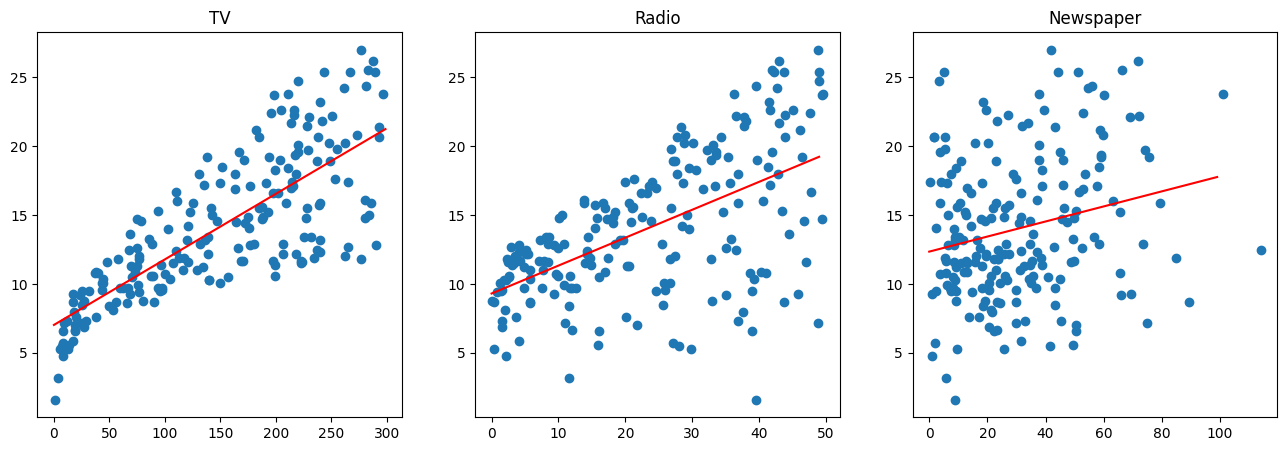

In [37]:
from matplotlib import pyplot as plt

%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize=(16, 5))


def draw(title, data, params, l, index):
    # 语法 [expression for i in iterable]
    x_temp = [i for i in range(0, l)]

    # 画线
    axes[index].plot(x_temp, [f(params, i) for i in x_temp], "r")

    # 画散点
    axes[index].scatter(data, target.values)
    axes[index].set_title(title)


draw("TV", data["TV"], tvParams[0], 300, 0)
draw("Radio", data["Radio"], radioParams[0], 50, 1)
draw("Newspaper", data["Newspaper"], newspaperParams[0], 100, 2)


# 数据绘图技巧
# 直接数据就有 plot 方法
# data.plot(kind='scatter', x='tv', y='sales', ax=axes[0])
# data.plot(kind='scatter', x='radio', y='sales', ax=axes[1])
# data.plot(kind='scatter', x='newspaper', y='sales', ax=axes[2])

# 绘制区间可以从数据的最大、最小值来控制
# x_tv = np.array([data.tv.min(), data.tv.max()])

# y = kx + b
# axes[0].plot(x_tv, params_tv[0][1]*x_tv + params_tv[0][0], 'r')

# x_radio = np.array([data.radio.min(), data.radio.max()])
# axes[1].plot(x_radio, params_radio[0][1]*x_radio + params_radio[0][0], 'r')

# x_newspaper = np.array([data.newspaper.min(), data.newspaper.max()])
# axes[2].plot(x_newspaper, params_newspaper[0][1] *
#              x_newspaper + params_newspaper[0][0], 'r')

In [41]:
##### 10.3 多元线性回归模型

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

features = data[["TV", "Radio", "Newspaper"]]

model = LinearRegression()
model.fit(features, target)

model.coef_, model.intercept_  # 返回模型自变量系数和截距项

(array([ 0.04576465,  0.18853002, -0.00103749]), 2.9388893694594103)

In [42]:
# 多次才用 PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# with PolynomialFeatures
poly_features = PolynomialFeatures(degree=1, include_bias=False)
poly_X_train = poly_features.fit_transform(features)

poly_model = LinearRegression()
poly_model.fit(poly_X_train, target)

poly_model.coef_, poly_model.intercept_  # 返回模型自变量系数和截距项

(array([ 0.04576465,  0.18853002, -0.00103749]), 2.9388893694594067)

In [46]:
##### 10.4

import statsmodels.api as sm

x = sm.add_constant(features)  # 添加截距项系数 1
model = sm.OLS(endog=target, exog=x)  # 普通最小二乘法, endog 因变量, exog 自变量
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: Sales            AIC:                780.3622
Date:               2024-04-15 01:27 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
const           2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
Radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
Newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
-----------------------------------------------------------------
Omnibus:             60.414       Durbin-Watson:          2.084  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       151.241
Skew:                -1.327       Prob(JB):               0.000  
Kurtosis:            6.332        Condition No.:          454    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [59]:
data.shape


(200, 4)

In [60]:
import statsmodels.formula.api as smf

# formula 有特定的格式......
# 直接输入数据，会根据formula中的名字去读取？
model_smf_full = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data)
results_smf_full = model_smf_full.fit()

results_smf_full.summary2()  # 输出模型摘要

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: Sales            AIC:                780.3622
Date:               2024-04-15 01:53 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
Radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
Newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
-----------------------------------------------------------------
Omnibus:             60.414       Durbin-Watson:          2.084  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       151.241
Skew:                -1.327       Prob(JB):               0.000  
Kurtosis:            6.332        Condition No.:          454    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [ ]:
# tv 和 radio 的 P 值接近于 0 [精度]，而 newspaper 的 P 值相对较大。我们可以认为 tv 和 radio 通过了变量显著性检验,而 newspaper 则未通过

In [64]:
model_smf_lack = smf.ols(formula='Sales ~ TV + Radio', data=data)
results_smf_lack = model_smf_lack.fit()

results_smf_lack.summary2()  # 输出模型摘要

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: Sales            AIC:                778.3941
Date:               2024-04-15 01:57 BIC:                788.2891
No. Observations:   200              Log-Likelihood:     -386.20 
Df Model:           2                F-statistic:        859.6   
Df Residuals:       197              Prob (F-statistic): 4.83e-98
R-squared:          0.897            Scale:              2.8270  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    2.9211     0.2945    9.9192   0.0000   2.3403   3.5019
TV           0.0458     0.0014   32.9087   0.0000   0.0430   0.0485
Radio        0.1880     0.0080   23.3824   0.0000   0.1721   0.2038
-----------------------------------------------------------------
Omnibus:             60.022       Durbin-Watson:          2.081  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       148.679
Skew:                -1.323       Prob(JB):               0.000  
Kurtosis:            6.292        Condition No.:          425    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [ ]:
# 包含和未包含 newspaper 的多元线性回归模型 R^2 值为 0.897,印证了 Newspaper 对于反映目标数值变化并无太大帮助